<a href="https://colab.research.google.com/github/VyomDW/Algorithms/blob/main/main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
#First thing
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Drive
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#Drive
!cd KneeDataRaw

In [ ]:
#Drive

import os

# Define the directory path
model_dir = '/content/drive/MyDrive/models/'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [ ]:
#flask
!ngrok authtoken 2jbmm1OjtpX18V4eVyNdKKUcvM1_6i6BcBPUCj96V8vyHo1hq


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
#Flask
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
#transform
import torch

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [ ]:
#Transform
!pip install streamlit


In [ ]:
#transform
!pip install numpy==1.26.4

In [ ]:
#transform
!pip install transformers==4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [ ]:
!pip install --upgrade tensorflow
#Needed for CNN

In [ ]:
#Needed for XG boost
!pip install -U xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.0
    Uninstalling xgboost-2.1.0:
      Successfully uninstalled xgboost-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_sys

# Models

In [ ]:
########################################
#Transform Model
########################################
#pre-requirement = picture upload

import os
import random
import shutil
from PIL import Image
from transformers import ViTForImageClassification, AutoImageProcessor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
model_name = 'google/vit-base-patch16-224'

classes = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']


# Load the model for testing individual images
##model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(classes), ignore_mismatched_sizes=True)
##model.load_state_dict(torch.load('transformers1.pth'))
##model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))


# Load the model for testing individual images
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(classes), ignore_mismatched_sizes=True)
# Load the model state dictionary and map it to the CPU if no GPU is available
model.load_state_dict(torch.load('/content/drive/MyDrive/KneeDataRaw/transformers1.pth', map_location=torch.device('cpu')))
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
#####################################################################################
# Define the image preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB mode
    image = transform(image)  # Apply transformations
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Predict class for an individual image
def predict_image(image_path):
    image = preprocess_image(image_path).to(device)  # Move image to the same device as the model
    with torch.no_grad():
        outputs = model(pixel_values=image)['logits']
        # _, predicted = torch.max(outputs, 1)
        # predicted_class = predicted.item()
    return outputs
   # return predicted_class

image_path = '/content/ModerateG3 (206).png'
predicted_class = predict_image(image_path)
print(f'Predicted Class: {predicted_class}')
# Add percentage confidence, add lowest to each tensor value

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Class: tensor([[ 1.0732, -0.2686, -0.1397,  1.4378, -0.4850]], device='cuda:0')


In [ ]:
########################################
# CNN Model
########################################
# pre-requirement =

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
from flask import Flask, request, jsonify # import Flask, request and jsonify

# Load the CNN model
cnn_model = load_model('/content/drive/MyDrive/cnn-model-2.h5')

def grayscale_image(image):
    if len(image.shape) != 3:
        return image
    # Ensure the image is a numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)
    elif not isinstance(image, np.ndarray):
        raise ValueError("The provided image must be a PIL Image or a numpy array.")

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray_img

# Function to resize images to the desired size
def resize_image(image, width, height):
    resized_img = cv2.resize(image, (width, height))
    return resized_img

app = Flask(__name__) # create an instance of the Flask class

@app.route('/predict', methods=['POST'])


def predict_cnn(image_path):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(200, 200), color_mode='grayscale')
        img_array = img_to_array(img)
        img_array /= 255.0  # Normalize pixel values between 0 and 1
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make prediction
        predictions = cnn_model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)
        confidence_value = np.max(predictions) * 100

        return int(predicted_class[0]), round(confidence_value, 2)
    except Exception as e:
        return {'error': str(e)}

Mean Squared Error: 0.2597189993101133
R-squared: 0.8138300325458148


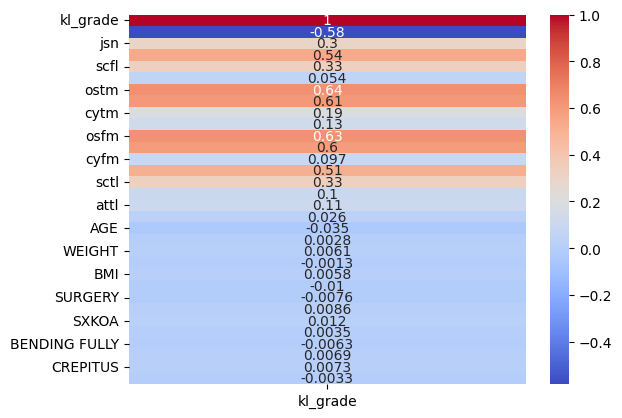

In [ ]:
#XG Boost


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('/content/drive/MyDrive/multilabel_missing-filled.csv')
data2 = pd.read_csv('/content/drive/MyDrive/clinical_info(in).csv')

# Data Preprocessing
data["osteophytes"].replace(to_replace={"def": 0, "poss": 1, "none": 2}, inplace=True)
data["jsn"].replace(to_replace={"def": 3, "severe": 2, "mild/mod": 1, "none": 0}, inplace=True)

data2["FREQUENT PAIN"].replace(to_replace={
    "5: Freq pain both knees": 5,
    "4: Freq pain 1 knee, infreq pain other knee": 4,
    "3: Freq pain 1 knee, no pain other knee": 3,
    "2: Infreq pain both knees": 2,
    "1: Infreq pain 1 knee, no pain other knee": 1,
    "0: No pain either knee": 0,
    "None": 0
}, inplace=True)

data2["SURGERY"].replace(to_replace={"1: Yes": 1, "0: No": 0}, inplace=True)
data2["RISK"].replace(to_replace={
    "5: Progression cohort": 5,
    "4: High risk": 4,
    "3: Medium risk": 3,
    "2: Low risk": 2,
    "1: Non-progression cohort": 1,
    "2: Incidence cohort: Risk factors  only": 2,
    "3: Incidence cohort: Knee sx + risk factors": 3,
    "1: Incidence cohort: Knee symptoms only": 1,
    "4: Incidence cohort: Protocol exception": 4,
    "0: Non-eligible control cohort": 0,
    "None": 0
}, inplace=True)

data2["SXKOA"].replace(to_replace={
    "0: Neither": 0,
    "1: Right knee only": 1,
    "3: Both knees": 3,
    "2: Left knee only": 2
}, inplace=True)

data2["SWELLING"].replace(to_replace={
    "0: Never": 0,
    "1: Rarely": 1,
    "2: Sometimes": 2,
    "3: Often": 3,
    "4: Always": 4
}, inplace=True)

data2["BENDING FULLY"].replace(to_replace={
    "0: Always": 0,
    "1: Often": 1,
    "2: Sometimes": 2,
    "3: Rarely": 3,
    "4: Never": 4
}, inplace=True)

data2["SYMPTOMATIC"].replace(to_replace={"0: No": 0, "1: Yes": 1}, inplace=True)
data2["CREPITUS"].replace(to_replace={"0: No": 0, "1: Yes": 1}, inplace=True)

# Merge datasets
data = pd.concat([data, data2], axis=1, join='inner')

# Drop irrelevant columns
data.drop(["id", "side", "subset", "filename", "actual_path", "SIDE", "FILENAME"], axis=1, inplace=True)

# Correlation heatmap
sns.heatmap(data.corr().iloc[:,:1], annot=True, cmap='coolwarm')

# Handle missing values
data.dropna(inplace=True)

# Split data into features and target
X = data.drop("kl_grade", axis=1)
y = data["kl_grade"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBRegressor with hyperparameters
xgb_r = xg.XGBRegressor(
    colsample_bytree=0.82,
    learning_rate=0.073,
    max_depth=5,
    n_estimators=88,
    objective='reg:squarederror',  # Use correct objective for regression
    reg_alpha=1.36,
    reg_lambda=0.00023,
    subsample=0.97,
    random_state=42,

)

# Fit the model
xgb_r.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_r.predict(X_test)

# Evaluate the model
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", MSE)
print("R-squared:", r2)


<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: FREQUENT PAIN
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: SURGERY
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: RISK
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 9592 entries, 0 to 9591
Series name: SXKOA
Non-Null Count  Dtype
--------------  -----
9592 non-null   int64
dtypes: int64(1)
memory usage: 75.1 KB
      kl_grade  osteophytes  jsn  osfl  scfl  cyfl  ostm  sctm  cytm  attm  \
0            3            0    2   2.0   2.0   0.0   0.0   0.0   1.0   0.0   
1            2            0    1   2.0   0.0   0.0 

['/content/drive/MyDrive/models/random_forest_model.pkl']

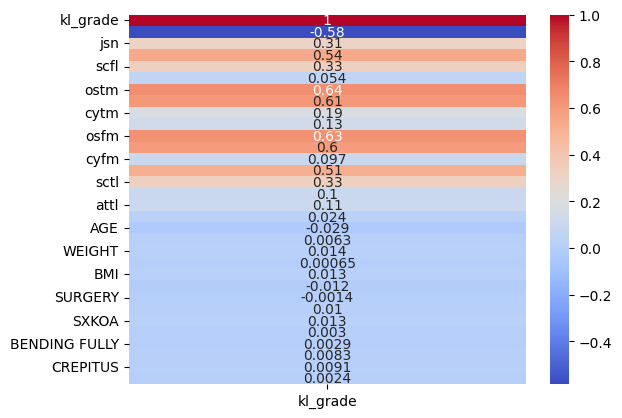

In [ ]:
#Random Forest Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg

data = pd.read_csv('/content/drive/MyDrive/multilabel_missing-filled.csv')
data2 = pd.read_csv('/content/drive/MyDrive/clinical_info(in).csv')
data.head()



'''
 print(data["osteophytes"])
 for x in data["osteophytes"]:
  if data["osteophytes"][x] == "def":
    data["osteophytes"][x] = 2
  elif data["osteophytes"][x] == "poss":
    data["osteophytes"][x] = 1
  elif data["osteophytes"][x] == "none":
    data["osteophytes"][x] = 0
  else:
    data["osteophytes"][x] = data["osteophytes"][x]
'''

data["osteophytes"].replace(to_replace = "def", value = 0, inplace = True)
data["osteophytes"].replace(to_replace = "poss", value = 1, inplace = True)
data["osteophytes"].replace(to_replace = "none", value = 2, inplace = True)
data["osteophytes"]

data["jsn"].replace(to_replace = "def", value = 3, inplace = True)
data["jsn"].replace(to_replace = "severe", value = 2, inplace = True)
data["jsn"].replace(to_replace = "mild/mod", value = 1, inplace = True)
data["jsn"].replace(to_replace = "none", value = 0, inplace = True)
data["jsn"]

data

#data.corr(["kl_grade", "osteophytes"])
data.drop("id", axis = 1, inplace = True)
data.drop("side", axis = 1, inplace = True)
data.drop("subset", axis = 1, inplace = True)
data.drop("filename", axis = 1, inplace = True)
data.drop("actual_path", axis = 1, inplace = True)
data.corr(method='pearson')


#data2.drop("ID", axis = 1, inplace = True)
#data2.drop(["SIDE","FILENAME"], axis = 1, inplace = True)
data2.head()

data2["FREQUENT PAIN"].nunique()

data2["FREQUENT PAIN"].replace(to_replace = "5: Freq pain both knees", value = 5, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "4: Freq pain 1 knee, infreq pain other knee", value = 4, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "3: Freq pain 1 knee, no pain other knee", value = 3, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "2: Infreq pain both knees", value = 2, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "1: Infreq pain 1 knee, no pain other knee", value = 1, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "0: No pain either knee", value = 0, inplace = True)
data2["FREQUENT PAIN"].replace(to_replace = "None", value = 0, inplace = True) # In case there are any "None" values
data2["FREQUENT PAIN"].info() # check to see if everything was converted to int
data2["FREQUENT PAIN"]

data2["SURGERY"].nunique()

data2["SURGERY"].replace(to_replace = "1: Yes", value = 1, inplace = True)
data2["SURGERY"].replace(to_replace = "0: No", value = 0, inplace = True)
data2["SURGERY"].info() # check to see if everything was converted to int
data2["SURGERY"]

data2["RISK"]
data2["RISK"].nunique()

data2["RISK"].replace(to_replace = "5: Progression cohort", value = 5, inplace = True)
data2["RISK"].replace(to_replace = "4: High risk", value = 4, inplace = True)
data2["RISK"].replace(to_replace = "3: Medium risk", value = 3, inplace = True)
data2["RISK"].replace(to_replace = "2: Low risk", value = 2, inplace = True)
data2["RISK"].replace(to_replace = "1: Non-progression cohort", value = 1, inplace = True)
data2["RISK"].replace(to_replace = "2: Incidence cohort: Risk factors  only", value = 2, inplace = True) # In case there are any "None" values
data2["RISK"].replace(to_replace = "3: Incidence cohort: Knee sx + risk factors", value = 3, inplace = True)
data2["RISK"].replace(to_replace = "1: Incidence cohort: Knee symptoms only", value = 1, inplace = True)
data2["RISK"].replace(to_replace = "4: Incidence cohort: Protocol exception", value = 4, inplace = True)
data2["RISK"].replace(to_replace = "0: Non-eligible control cohort", value = 0, inplace = True)
data2["RISK"].replace(to_replace = "None", value = 0, inplace = True)

data2["RISK"].info() # check to see if everything was converted to int
data2["RISK"]

data2["SXKOA"].nunique()

data2["SXKOA"].replace(to_replace = "0: Neither", value = 0, inplace = True)
data2["SXKOA"].replace(to_replace = "1: Right knee only", value = 1, inplace = True)
data2["SXKOA"].replace(to_replace = "3: Both knees", value = 3, inplace = True)
data2["SXKOA"].replace(to_replace = "2: Left knee only", value = 2, inplace = True)
# Handle the value '1' based on your understanding of the data
# For example, if '1' represents a third category, you might assign it a value of 3:
# data2["SXKOA"].replace(to_replace = 1, value = 3, inplace = True)

data2["SXKOA"].info()
data2["SXKOA"]

# First digit of each strng
data2['SWELLING'].nunique()
data2['SWELLING'].unique()

data2["SWELLING"].replace(to_replace = "0: Never", value = 0, inplace = True)
data2["SWELLING"].replace(to_replace = "1: Rarely", value = 1, inplace = True)
data2["SWELLING"].replace(to_replace = "2: Sometimes", value = 2, inplace = True)
data2["SWELLING"].replace(to_replace = "3: Often", value = 3, inplace = True)
data2["SWELLING"].replace(to_replace = "4: Always", value = 4, inplace = True)

data2["SWELLING"].head(50)

data2["BENDING FULLY"].replace(to_replace = "0: Always", value = 0, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "1: Often", value = 1, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "2: Sometimes", value = 2, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "3: Rarely", value = 3, inplace = True)
data2["BENDING FULLY"].replace(to_replace = "4: Never", value = 4, inplace = True)
data2["BENDING FULLY"].head(20)

data2['SYMPTOMATIC'].unique()

data2["SYMPTOMATIC"].replace(to_replace = "0: No", value = 0, inplace = True)
data2["SYMPTOMATIC"].replace(to_replace = "1: Yes", value = 1, inplace = True)

data2["SYMPTOMATIC"]

data2["CREPITUS"].unique()

data2["CREPITUS"].replace(to_replace = "0: No", value = 0, inplace = True)
data2["CREPITUS"].replace(to_replace = "1: Yes", value = 1, inplace = True)
data2["CREPITUS"].head(20)

print(data)
print(data2)
data = pd.concat([data, data2], axis=1, join='inner')
data

data.info()

data.drop(["SIDE","FILENAME"], axis = 1, inplace = True)

data.info()

"""# Checking Data Corr"""

data.dropna(inplace=True)

#make a heatmap for correlation of kl_grade
sns.heatmap(data.corr().iloc[:,:1], annot=True, cmap='coolwarm')
data.corr().iloc[:,:1]

"""#test train split"""

#X = data[["osteophytes","sctm","scfm","ostm","osfm","osfl","ostl"]]
X = X = data.drop("kl_grade", axis=1)
y = data["kl_grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from colorsys import yiq_to_rgb
xgb_r = xg.XGBRegressor(random_state = 42,n_jobs=-1, tree_method='gpu_hist')

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

rf_regressor = RandomForestRegressor(n_estimators=2000,n_jobs = -1,max_features='log2',bootstrap = True,min_samples_split = 2)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", MSE)
print("R-squared:", r2)


#

import joblib

# Define the model path
model_path = os.path.join(model_dir, 'random_forest_model.pkl')

# Save the Random Forest model
joblib.dump(rf_regressor, model_path)

# Flask

In [ ]:
########################################

########################################
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

#######################################

########################################
# Flask Frontend and Backend
########################################
from flask import Flask, request, render_template_string, jsonify, send_from_directory
from pyngrok import ngrok
import os
import uuid
import torch
from PIL import Image
from torchvision import transforms
from transformers import ViTForImageClassification
from werkzeug.utils import secure_filename


#Sets up the Flask app and configures the upload folder
app = Flask(__name__)

UPLOAD_FOLDER = 'uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

#  Configures the device for PyTorch and sets up image transformations and class labels.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

classes = ['0 - Normal', '1 - Doubtful', '2 - Mild', '3 - Moderate', '4 - Severe']


# structure and styling of the web interface
#uses Bootstrap for responsive design and custom CSS for additional styling.
# HTML Template
html_template = '''
<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>MRI Scan Arthritis Assessment</title>
  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/5.3.0/css/bootstrap.min.css">
  <link href="https://fonts.googleapis.com/css2?family=Spectral:wght@400;500;700&display=swap" rel="stylesheet">
  <style>
    body {
      font-family: 'Spectral', serif;
      background-color: #2a2a2a;
      color: #f0f0f0;
    }
    .container {
      max-width: 1200px;
      margin: auto;
    }
    .section {
      padding: 20px;
      background-color: #3b3b3b;
      border-radius: 8px;
      box-shadow: 0 2px 4px rgba(0,0,0,0.1);
      margin-bottom: 20px;
    }
    .uploaded-image img {
      max-width: 100%;
      border: 2px solid #ff69b4;
      border-radius: 10px;
      box-shadow: 0 4px 8px rgba(0,0,0,0.2);
    }
    .btn-custom {
      background-color: #ff69b4;
      color: #fff;
      border: none;
      border-radius: 5px;
    }
    .btn-custom:hover {
      background-color: #ff1493;
      color: #fff;
    }
    h1, h2 {
      color: #ff69b4;
    }
    .grid-container {
      display: grid;
      grid-template-columns: repeat(3, 1fr);
      gap: 20px;
    }
    .grid-item {
      background-color: #4b4b4b;
      border-radius: 8px;
      padding: 20px;
      text-align: center;
    }
    .center-section {
      grid-column: 2 / span 1;
      background-color: #3b3b3b;
      padding: 40px 20px;
    }
    .description, .commitment, .purpose, .education {
      font-size: 1.1rem;
      color: #c0c0c0;
    }
    footer {
      text-align: center;
      padding: 20px 0;
      color: #666;
    }
    .section-purpose {
      margin-top: 40px;
    }
  </style>
</head>
<body>
  <div class="container">
    <header class="text-center mb-4">
      <h1>MRI Scan Arthritis Assessment</h1>
    </header>

    <div class="grid-container">
      <div class="grid-item">
        <h2>About the Application</h2>
        <p class="description">
          Welcome to the MRI Scan Arthritis Assessment application, developed by the UTD CS AI Team. Our tool offers
          valuable insights into arthritis severity using knee MRI scans. This technology aids in assessing the arthritis
          scale from 1 to 5:
        </p>
        <ul>
          <li><strong>0:</strong> Minimal or no arthritis.</li>
          <li><strong>1:</strong> Mild arthritis.</li>
          <li><strong>2:</strong> Moderate arthritis.</li>
          <li><strong>3:</strong> Severe arthritis.</li>
          <li><strong>4:</strong> Very severe arthritis or end-stage arthritis.</li>
        </ul>
      </div>

      <div class="center-section">
        <h2>Upload MRI Scan</h2>
        <form id="uploadForm">
          <div class="form-group">
            <label for="fileInput">Select MRI Scan Image:</label>
            <input type="file" class="form-control" id="fileInput" />
          </div>
          <div class="form-group mt-3">
            <label for="modelType">Model Type:</label>
            <select class="form-control" id="modelType">
              <option value="cnn">CNN</option>
              <option value="transformer">Transformer</option>
            </select>
          </div>
          <button type="button" class="btn btn-custom mt-3" onclick="uploadFile()">Upload</button>
        </form>
        <div id="result" class="text-center mt-3 uploaded-image">
          <!-- Uploaded image will be shown here -->
        </div>
      </div>

      <div class="grid-item">
        <h2>Our Commitment</h2>
        <p class="commitment">
          Our mission extends beyond just providing assessments; we are committed to advancing education in the field of
          artificial intelligence and healthcare. By integrating innovative technologies and cutting-edge research, we aim
          to enhance understanding and management of arthritis. We believe in the power of education and collaboration to
          drive positive change and improve patient outcomes.
        </p>
      </div>
    </div>

    <section class="section section-purpose">
      <h2>Purpose of the Project</h2>
      <p class="purpose">
        This project reflects our dedication to leveraging technology for societal benefit. We are passionate about
        supporting both patients and healthcare professionals by providing tools that facilitate better decision-making and
        contribute to the broader goal of advancing medical science and patient care.
      </p>
    </section>

    <section class="section">
      <h2>Commitment to Education</h2>
      <p class="education">
        Our commitment to education is at the heart of this project. By collaborating with experts and continuously
        improving our algorithms, we strive to make significant contributions to the field of AI in healthcare. This project
        serves as a testament to our dedication to fostering learning and innovation.
      </p>
    </section>
  </div>

  <footer>
    <p>© 2024 UTD CS AI Team. All Rights Reserved.</p>
  </footer>

  <script>
    function uploadFile() {
      const fileInput = document.getElementById('fileInput');
      const file = fileInput.files[0];
      const modelType = document.getElementById('modelType').value;

      if (!file) {
        alert('Please select a file first.');
        return;
      }

      const formData = new FormData();
      formData.append('file', file);
      formData.append('model_type', modelType);

      fetch('/upload', {
        method: 'POST',
        body: formData
      })
      .then(response => response.json())
      .then(data => {
        const resultDiv = document.getElementById('result');
        if (data.image_url) {
          resultDiv.innerHTML = `<img src="${data.image_url}" alt="Uploaded Image">`;
        }
        if (data.prediction) {
          resultDiv.innerHTML += `<p><strong>Predicted Class:</strong> ${data.prediction.class}</p>`;
          resultDiv.innerHTML += `<p><strong>Confidence Level:</strong> ${data.prediction.confidence}%</p>`;
          resultDiv.innerHTML += `<p><strong>Severity Level:</strong> ${data.prediction.severity}</p>`;
        }
      })
      .catch(error => {
        console.error('Error:', error);
      });
    }
  </script>
</body>
</html>
'''
#the Flask routes for handling the main page, file uploads, and serving uploaded files.
@app.route('/')
def index():
    return render_template_string(html_template)

@app.route('/upload', methods=['POST'])
def upload_file():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part'}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No selected file'}), 400

    model_type = request.form.get('model_type', 'cnn')
    if model_type not in ['cnn', 'transformer']:
        return jsonify({'error': 'Invalid model type'}), 400

    # Save the file
    filename = secure_filename(file.filename)
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    file.save(filepath)

    # Prediction
    if model_type == 'cnn':
        predicted_class, confidence_value = predict_cnn(filepath)
    elif model_type == 'transformer':
        predicted_class, confidence_value = predict_image_transformer(filepath)

    # Convert predicted class to severity level
    severity = classes[predicted_class]

    return jsonify({
        'image_url': f'/uploads/{filename}',
        'prediction': {
            'class': severity,
            'confidence': confidence_value,
            'severity': severity
        }
    })

@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'], filename)

#Runs the Flask app and exposes it to the internet using ngrok.
def run_with_ngrok():
    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f'Public URL: {public_url}')

    # Start Flask app
    app.run(host='0.0.0.0', port=5000)

if __name__ == '__main__':
    run_with_ngrok()


ModuleNotFoundError: No module named 'pyngrok'